<a href="https://colab.research.google.com/github/Kajalnsingh/Customer_Churn_Analysis/blob/main/Customer_Churn_Prediction_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#imported the data
sheet_name = 'vw_churn'
data = pd.read_excel('/content/Churn prediction.xlsx', sheet_name = sheet_name)
data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,No Deal,Yes,No,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,No Deal,Yes,Yes,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,No Deal,Yes,No,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,43397-UTT,Female,41,No,Uttar Pradesh,6,33,No Deal,Yes,Yes,...,Credit Card,74.40,896.75,0.00,0,37.96,934.71,Churned,Competitor,Competitor made better offer
6003,22240-HAR,Male,51,Yes,Haryana,0,19,Deal 1,No,No,...,Credit Card,45.25,3139.80,0.00,0,0.00,3139.80,Stayed,Others,Others
6004,78682-KER,Female,65,Yes,Kerala,14,25,No Deal,Yes,Yes,...,Bank Withdrawal,74.95,2869.85,0.00,0,599.64,3469.49,Churned,Dissatisfaction,Product dissatisfaction
6005,17816-ODI,Male,23,No,Odisha,2,10,No Deal,Yes,Yes,...,Credit Card,70.15,4480.70,0.00,0,2107.52,6588.22,Stayed,Others,Others


In [ ]:
#getting data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   6007 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                6007 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [ ]:
data['Customer_Status']

,Customer_Status
0,Stayed
1,Stayed
2,Churned
3,Churned
4,Churned
...,...
6002,Churned
6003,Stayed
6004,Churned
6005,Stayed


In [ ]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [ ]:
data = data.drop(['Customer_ID','Churn_Category','Churn_Reason'], axis = 1)

In [ ]:
# List of columns to be label encoded (categorical columns)
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service',
    'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security',
    'Online_Backup', 'Device_Protection_Plan', 'Premium_Support',
    'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data',
    'Contract', 'Paperless_Billing', 'Payment_Method'
]

# Encode categorical variables
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Encode the target variable 'Customer_Status' (e.g., Stayed = 0, Churned = 1)
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


In [ ]:
#split data into x and y
x = data.drop('Customer_Status',axis = 1)
y = data['Customer_Status']

#train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4805, 28), (1202, 28), (4805,), (1202,))

Logistic Regression

In [ ]:
LR = LogisticRegression(max_iter = 1000)
LR.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8244592346089851
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       841
           1       0.73      0.65      0.69       361

    accuracy                           0.82      1202
   macro avg       0.80      0.78      0.78      1202
weighted avg       0.82      0.82      0.82      1202



Decision Tree

In [ ]:
#instalise Decision Tree classifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

In [ ]:
#train the model
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#making predictions
y_pred = DT.predict(x_test)

In [ ]:
#evaluating DT performance
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.7712146422628952
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       841
           1       0.62      0.62      0.62       361

    accuracy                           0.77      1202
   macro avg       0.73      0.73      0.73      1202
weighted avg       0.77      0.77      0.77      1202



Random Forest classifer

In [ ]:
#Train the Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Evaluate Model
#make predictions
y_pred = rf_model.predict(x_test)
print("Accuracy Score")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("CLassification Report")
print(classification_report(y_test, y_pred))


Accuracy Score
0.8544093178036606
Confusion Matrix
[[791  50]
 [125 236]]
CLassification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       841
           1       0.83      0.65      0.73       361

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.85      0.85      0.85      1202



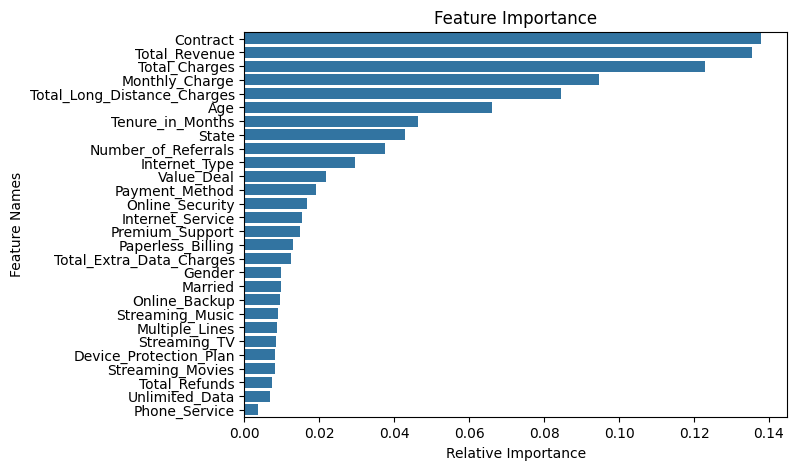

In [ ]:
#Feature Selection from feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

#plot feature importance
plt.figure(figsize = (7,5))
sns.barplot(x = importances[indices], y = x.columns[indices])
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Names")
plt.show()

In [ ]:
# 1. Drop columns not useful for prediction
data = data.drop([
    'Customer_ID', 'Phone_Service', 'Unlimited_Data', 'Streaming_Movies',
    'Device_Protection_Plan', 'Streaming_TV', 'Multiple_Lines', 'Streaming_Music',
    'Churn_Category', 'Churn_Reason'
], axis=1)

# 2. Encode categorical columns
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal',
    'Internet_Service', 'Internet_Type', 'Online_Security',
    'Online_Backup', 'Premium_Support',
    'Contract', 'Paperless_Billing', 'Payment_Method'
]

label_encoders = {}
for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# 3. Encode the target variable
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# 4. Drop rows with missing target values (e.g., 'Joined' or NaNs)
data = data.dropna(subset=['Customer_Status'])

# 5. Split data into features (X) and target (y)
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# 6. Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# 8. Evaluate the model
y_pred = rf_model.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[786  55]
 [137 224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       841
           1       0.80      0.62      0.70       361

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.83      1202



In [ ]:
# 1. Load new data
sheet_name = "vw_joined"
new_data = pd.read_excel('/content/Churn prediction.xlsx', sheet_name=sheet_name)

# 2. Copy original
original_data = new_data.copy()

# 3. Keep Customer_ID for output
customer_ids = new_data['Customer_ID']

# 4. Drop same columns dropped during training
columns_to_drop = [
    'Customer_ID', 'Customer_Status', 'Churn_Reason', 'Churn_Category',
    'Phone_Service', 'Unlimited_Data', 'Streaming_Movies',
    'Device_Protection_Plan', 'Streaming_TV', 'Multiple_Lines', 'Streaming_Music'
]
new_data = new_data.drop(columns=columns_to_drop)

# 5. Encode using the label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column])
    else:
        raise ValueError(f"No label encoder found for column: {column}")

# 6. Make prediction
new_prediction = rf_model.predict(new_data)

# 7. Add prediction to original data
original_data['customer_status_predicted'] = new_prediction

# 8. Filter predicted churned customers
churned_customers = original_data[original_data['customer_status_predicted'] == 1]

# 9. Save
churned_customers.to_csv("churned_customers.csv", index=False)

print("Prediction done and saved to 'churned_customers.csv'")


Prediction done and saved to 'churned_customers.csv'


In [ ]:
from google.colab import files
files.download('churned_customers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>